In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
y_all, loss_all, loss_vec_all, preds_all = [], [], [], []
files = glob.glob('tensors/*.npz')
for i_file, p in enumerate(files):
#     print('%d / %d' % (i_file + 1, len(files)))
    npz = np.load(p)
    y_i, loss_i, loss_vec_i, preds_i = [npz[k] for k in ['y', 'loss', 'loss_vec', 'preds']]
    y_all.append(y_i)
    loss_all.append(loss_i)
    loss_vec_all.append(loss_vec_i)
    preds_all.append(preds_i)

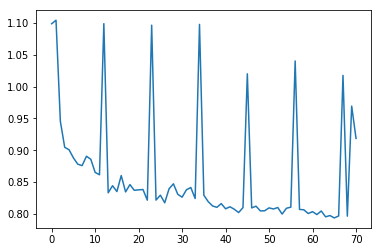

In [11]:
plt.plot(loss_all)

In [30]:
conf_mats = []
accuracies = []

for y, preds in zip(y_all, preds_all):
    n_classes = 3
    pred_classes = preds.argmax(axis=1)
    mat = confusion_matrix(y, pred_classes, labels=range(n_classes))
    accuracy = float(np.diag(mat).sum()) / mat.sum()
    accuracies.append(accuracy)
    conf_mats.append(mat)

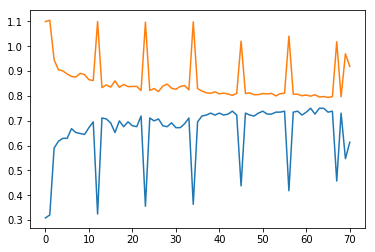

In [33]:
plt.plot(accuracies)
plt.plot(loss_all)

In [42]:
print('accuracy:', np.max(accuracies))
print('confusion matrix:\n', conf_mats[np.argmax(accuracies)])

accuracy: 0.75
confusion matrix:
 [[57 13  8]
 [12 63 21]
 [ 2  8 72]]


In [18]:
i_epoch = 0
y, loss, loss_vec, preds = y_all[i_epoch], loss_all[i_epoch], loss_vec_all[i_epoch], preds_all[i_epoch]

probs = preds - np.max(preds, axis=1, keepdims=True)
probs = np.exp(probs)
probs /= np.sum(probs, axis=1, keepdims=True)
loss_vec_np = -np.log(probs[np.arange(probs.shape[0]), y])

print(loss_vec_np[:10])
print(loss_vec[:10])

print(np.mean(loss_vec_np))
print(loss)

pred_classes = preds.argmax(axis=1)
print(confusion_matrix(y, pred_classes, labels=range(3)))

[1.0938838 1.1027399 1.1011999 1.0931734 1.1001774 1.1051548 1.1011926
 1.1014123 1.1031008 1.0919782]
[1.0938838 1.1027399 1.1011999 1.0931734 1.1001774 1.1051548 1.1011926
 1.1014124 1.1031008 1.0919781]
1.0988221
1.0988221
[[77  1  0]
 [95  1  0]
 [79  2  1]]
